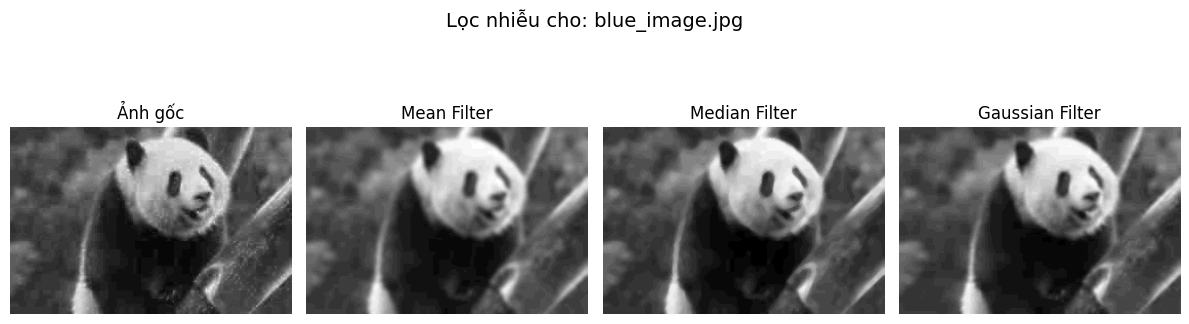

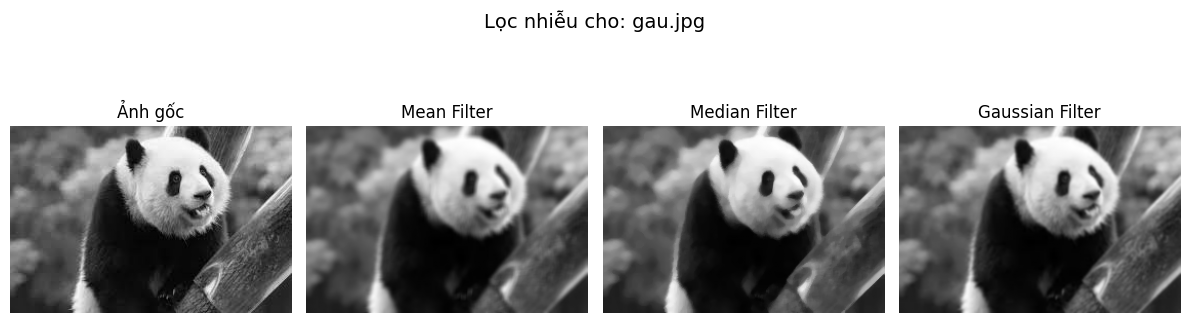

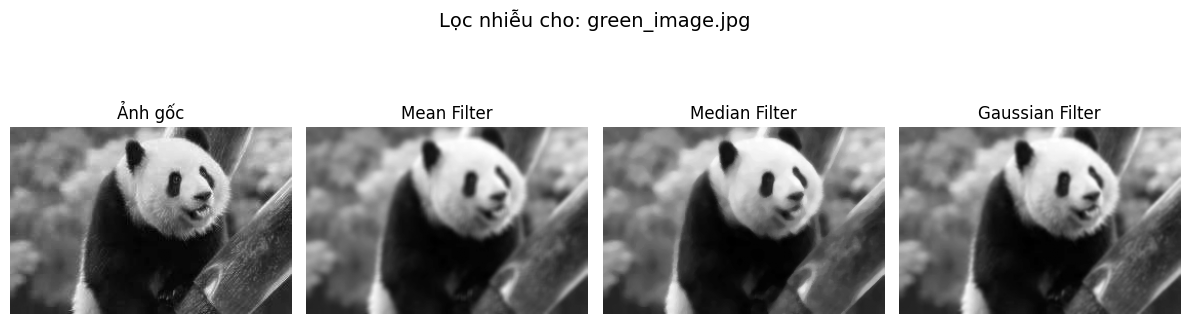

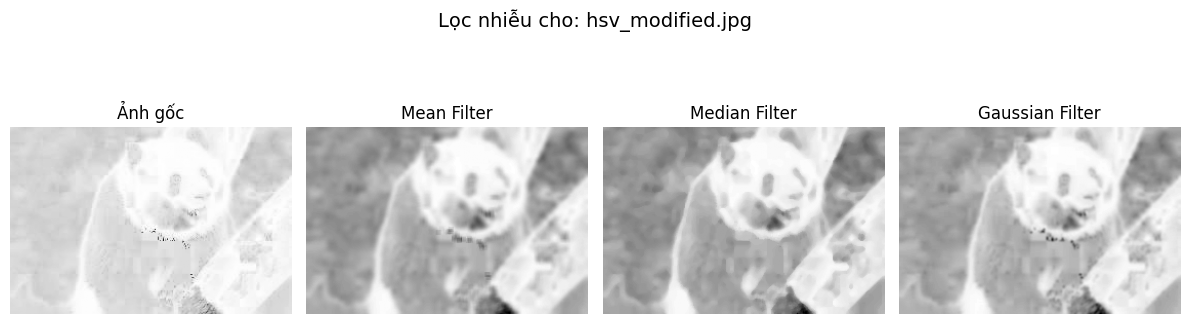

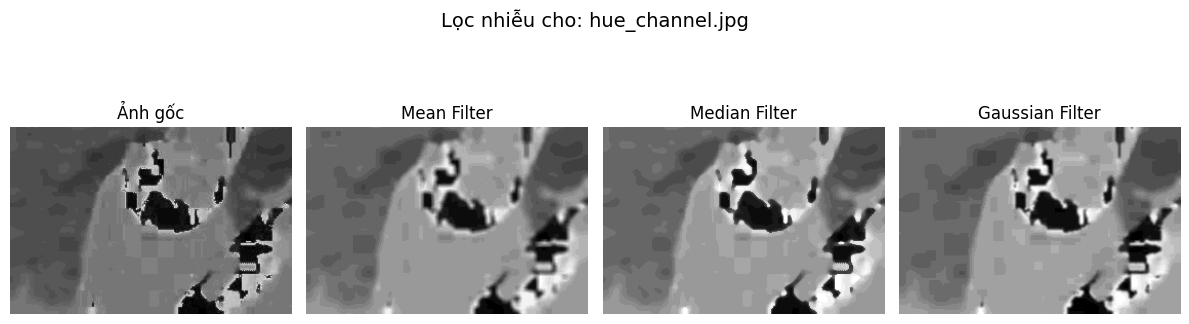

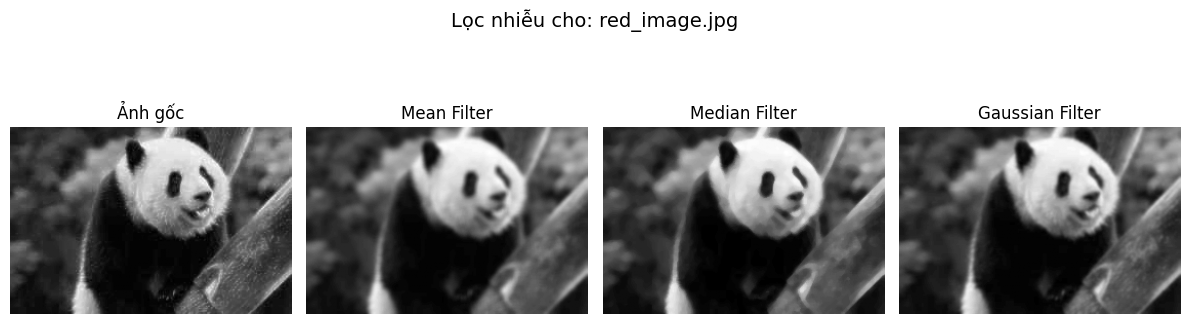

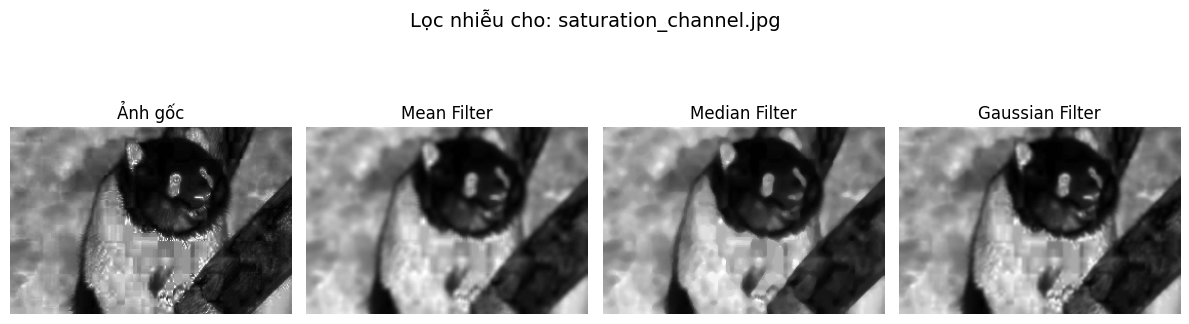

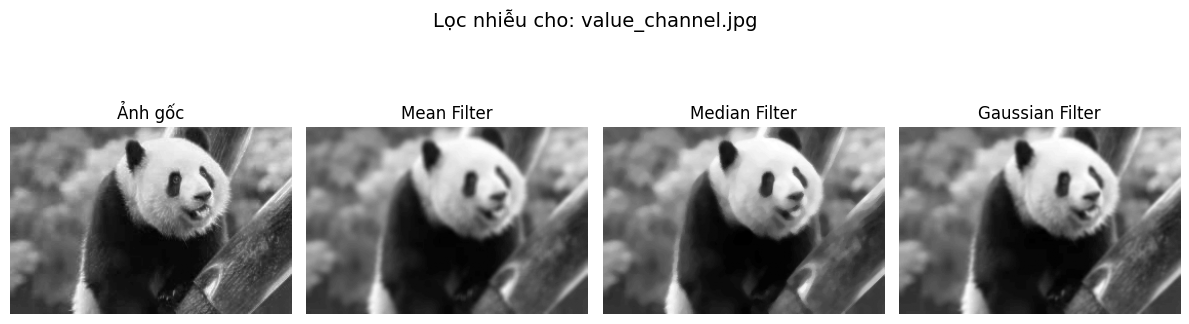

In [ ]:
#bài 6
import os
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr

# Đường dẫn thư mục
input_dir = 'Exercise'
output_dir = 'Exercise_filtered'
os.makedirs(output_dir, exist_ok=True)

# Khởi tạo filter
mean_kernel = np.ones((5, 5)) / 25

# Lấy danh sách file ảnh
image_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('.jpg'))]

# Áp dụng từng bộ lọc
for filename in image_files:
    path_in = os.path.join(input_dir, filename)
    original = iio.imread(path_in, mode='L')

    # Mean Filter
    mean_filtered = sn.convolve(original, mean_kernel).astype(np.uint8)

    # Median Filter
    median_filtered = sn.median_filter(original, size=5).astype(np.uint8)

    # Gaussian Filter
    gaussian_filtered = sn.gaussian_filter(original, sigma=1).astype(np.uint8)

    # Lưu ảnh
    iio.imwrite(os.path.join(output_dir, f'mean_{filename}'), mean_filtered)
    iio.imwrite(os.path.join(output_dir, f'median_{filename}'), median_filtered)
    iio.imwrite(os.path.join(output_dir, f'gaussian_{filename}'), gaussian_filtered)

    # Hiển thị ảnh so sánh
    plt.figure(figsize=(12, 4))
    plt.suptitle(f'Lọc nhiễu cho: {filename}', fontsize=14)

    plt.subplot(1, 4, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Ảnh gốc')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(mean_filtered, cmap='gray')
    plt.title('Mean Filter')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(median_filtered, cmap='gray')
    plt.title('Median Filter')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(gaussian_filtered, cmap='gray')
    plt.title('Gaussian Filter')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


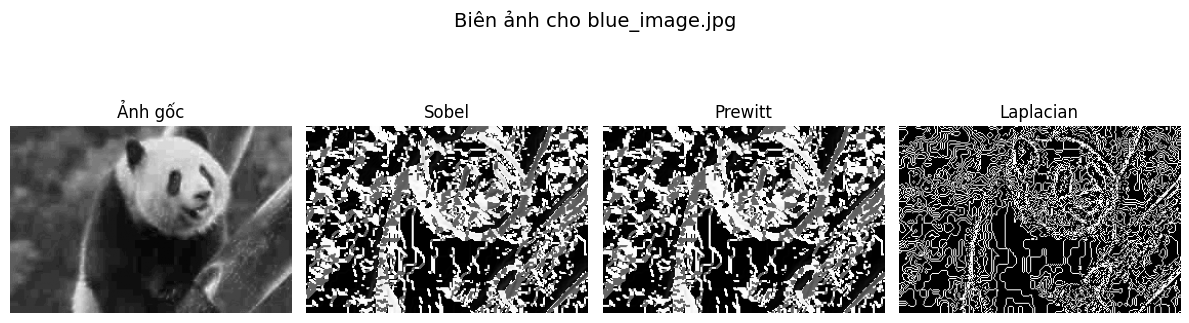

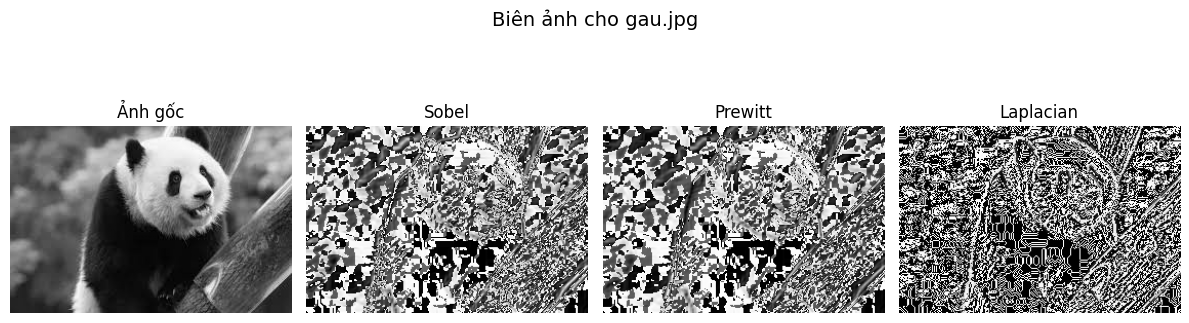

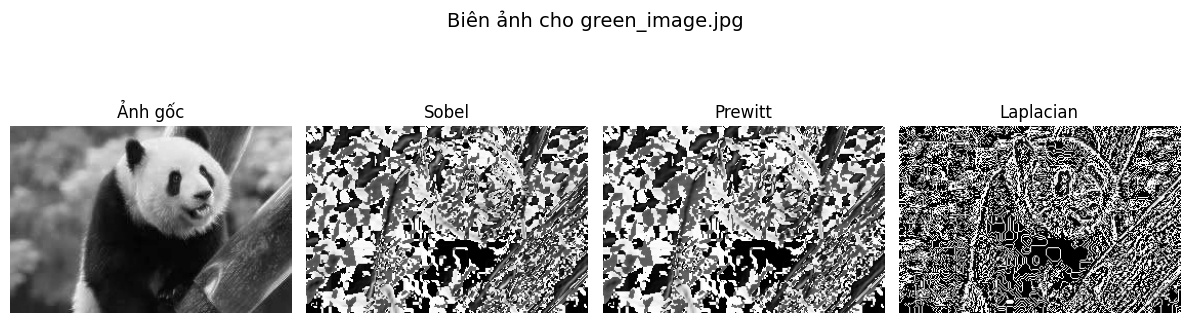

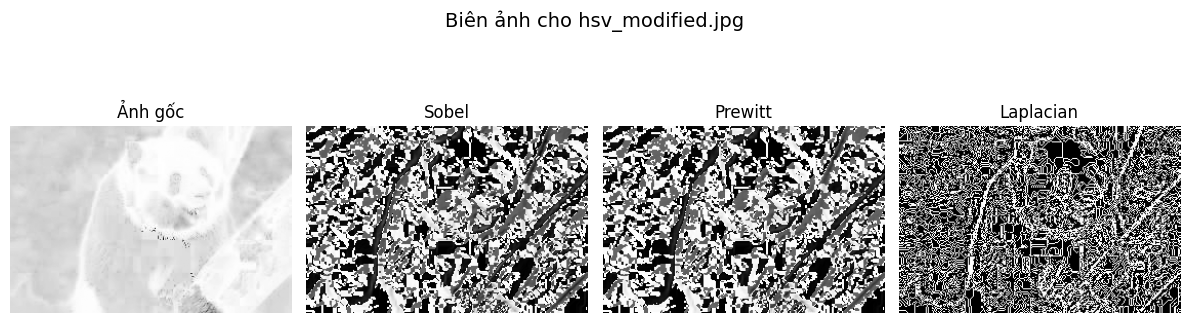

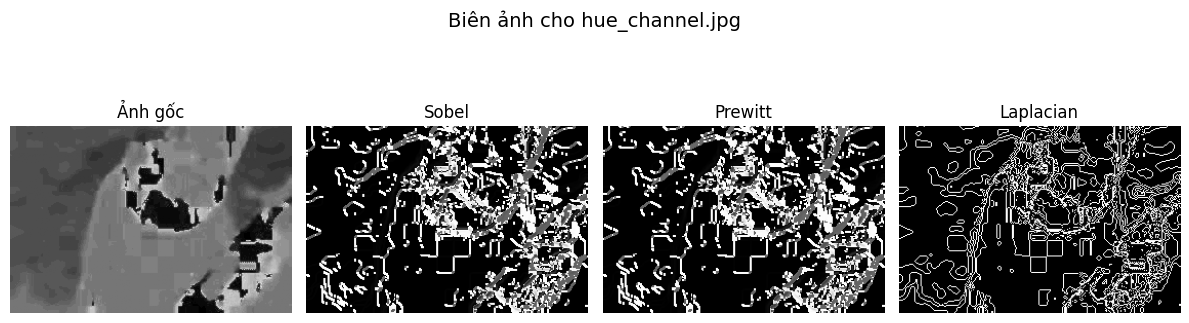

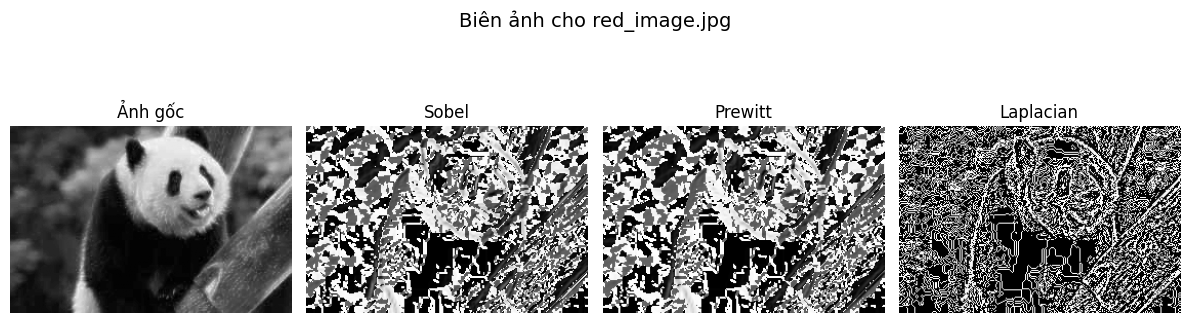

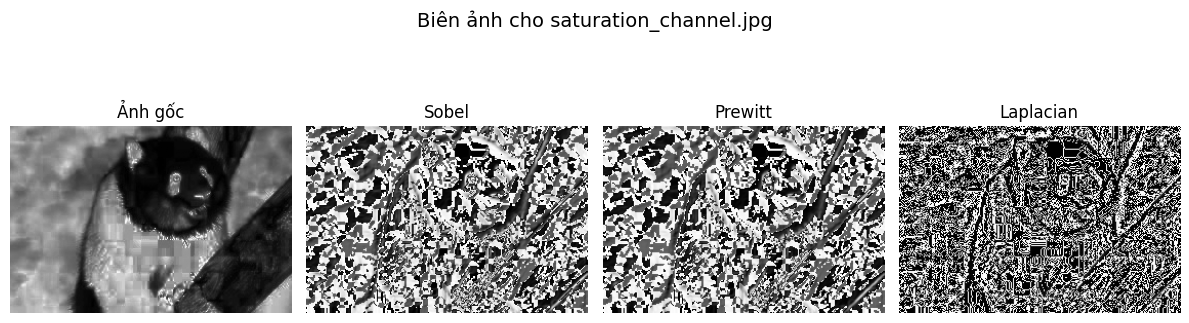

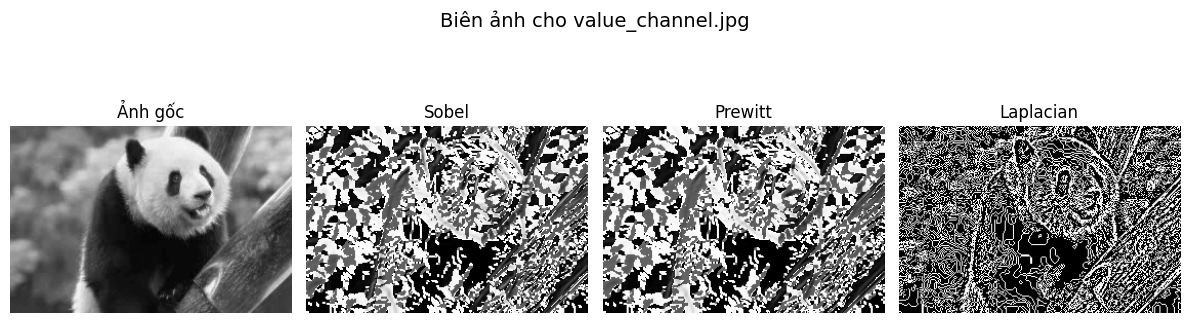

In [ ]:
# bài 7
import os
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pyplot as plt

# Thư mục chứa ảnh gốc và lưu ảnh kết quả
input_dir = 'Exercise'
output_dir = 'Exercise_edges'
os.makedirs(output_dir, exist_ok=True)

# Lấy danh sách ảnh
image_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('.jpg'))]

# Xử lý từng ảnh
for filename in image_files:
    path_in = os.path.join(input_dir, filename)
    img = iio.imread(path_in, mode='L')

    # Bước 1: Khử nhiễu bằng median filter
    denoised = sn.median_filter(img, size=3)

    # Bước 2: Xác định biên

    # Sobel
    sobel_x = sn.sobel(denoised, axis=0)
    sobel_y = sn.sobel(denoised, axis=1)
    sobel = np.hypot(sobel_x, sobel_y).astype(np.uint8)

    # Prewitt
    prewitt_x = sn.prewitt(denoised, axis=0)
    prewitt_y = sn.prewitt(denoised, axis=1)
    prewitt = np.hypot(prewitt_x, prewitt_y).astype(np.uint8)

    # Laplacian
    laplace = sn.laplace(denoised).astype(np.uint8)

    # Bước 3: Lưu ảnh kết quả
    iio.imwrite(os.path.join(output_dir, f'{filename}_sobel.png'), sobel)
    iio.imwrite(os.path.join(output_dir, f'{filename}_prewitt.png'), prewitt)
    iio.imwrite(os.path.join(output_dir, f'{filename}_laplace.png'), laplace)

    # Bước 4: Hiển thị ảnh kết quả
    plt.figure(figsize=(12, 4))
    plt.suptitle(f'Biên ảnh cho {filename}', fontsize=14)

    plt.subplot(1, 4, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Ảnh gốc')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(sobel, cmap='gray')
    plt.title('Sobel')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(prewitt, cmap='gray')
    plt.title('Prewitt')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(laplace, cmap='gray')
    plt.title('Laplacian')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


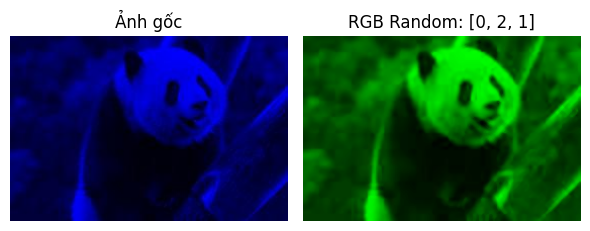

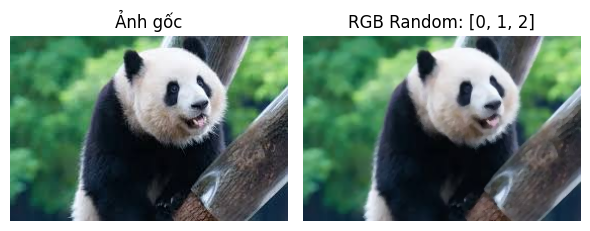

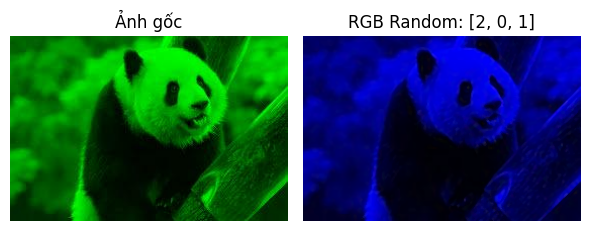

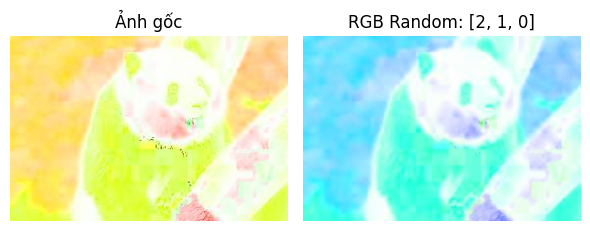

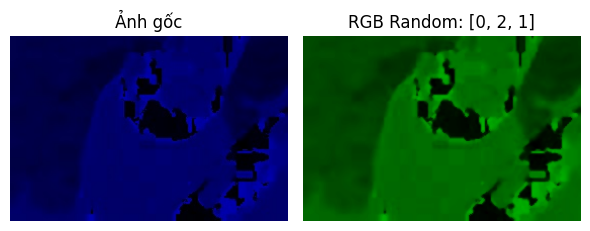

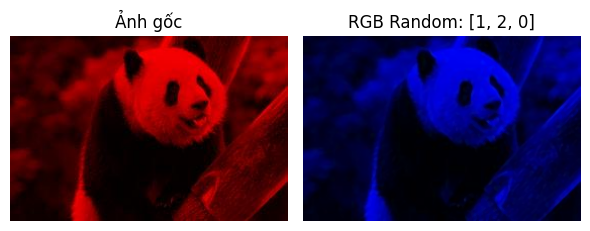

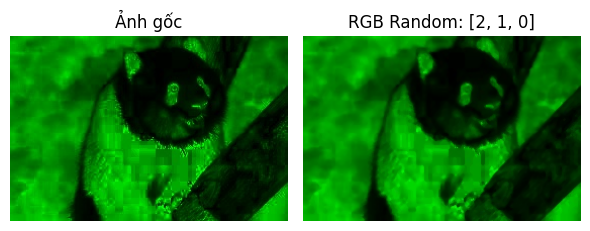

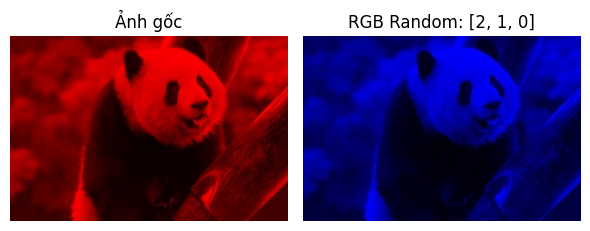

In [4]:
#bài 8
import os
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as sn
import matplotlib.pyplot as plt
import random

# Thư mục ảnh gốc và ảnh đầu ra
input_dir = 'Exercise'
output_dir = 'Exercise_rgb_random'
os.makedirs(output_dir, exist_ok=True)

# Danh sách file ảnh hợp lệ
image_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg', '.bmp'))]

for filename in image_files:
    path_in = os.path.join(input_dir, filename)
    img = iio.imread(path_in)

    # Kiểm tra có phải ảnh màu (RGB) không
    if img.ndim != 3 or img.shape[2] != 3:
        print(f"Bỏ qua ảnh không phải RGB: {filename}")
        continue

    # Bước 1: Khử nhiễu bằng median filter cho từng kênh
    denoised = np.zeros_like(img)
    for c in range(3):
        denoised[:, :, c] = sn.median_filter(img[:, :, c], size=3)

    # Bước 2: Hoán đổi kênh màu ngẫu nhiên
    order = list(range(3))
    random.shuffle(order)
    shuffled_img = denoised[:, :, order]

    # Bước 3: Lưu và hiển thị ảnh
    out_path = os.path.join(output_dir, f"randomRGB_{filename}")
    iio.imwrite(out_path, shuffled_img)

    # Hiển thị ảnh
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Ảnh gốc")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(shuffled_img)
    plt.title(f"RGB Random: {order}")
    plt.axis('off')

    plt.tight_layout()
    plt.show()


Đã lưu: Exercise_hsv_random\hsv_random_blue_image.jpg (hoán đổi HSV [0, 1, 2] -> [1, 0, 2])


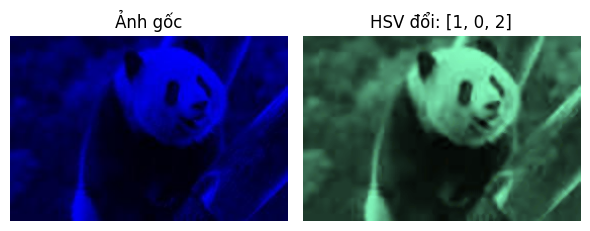

Đã lưu: Exercise_hsv_random\hsv_random_gau.jpg (hoán đổi HSV [0, 1, 2] -> [1, 0, 2])


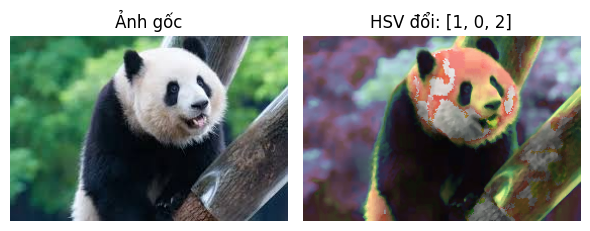

Đã lưu: Exercise_hsv_random\hsv_random_green_image.jpg (hoán đổi HSV [0, 1, 2] -> [0, 2, 1])


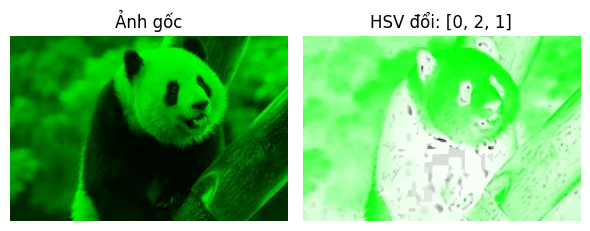

Đã lưu: Exercise_hsv_random\hsv_random_hsv_modified.jpg (hoán đổi HSV [0, 1, 2] -> [1, 2, 0])


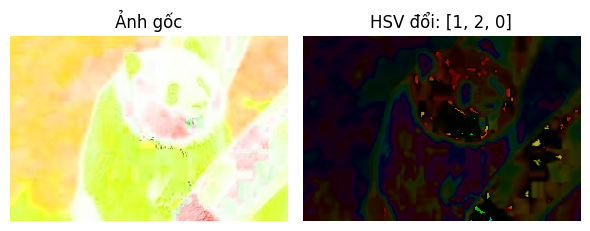

Đã lưu: Exercise_hsv_random\hsv_random_hue_channel.jpg (hoán đổi HSV [0, 1, 2] -> [2, 0, 1])


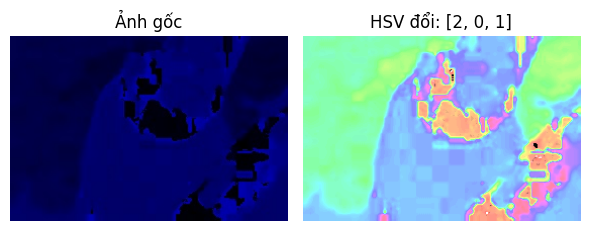

Đã lưu: Exercise_hsv_random\hsv_random_red_image.jpg (hoán đổi HSV [0, 1, 2] -> [1, 2, 0])


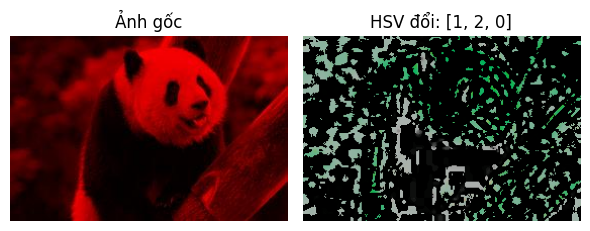

Đã lưu: Exercise_hsv_random\hsv_random_saturation_channel.jpg (hoán đổi HSV [0, 1, 2] -> [2, 0, 1])


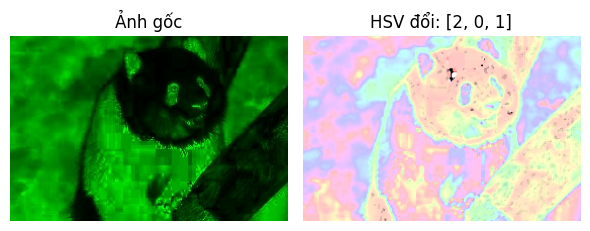

Đã lưu: Exercise_hsv_random\hsv_random_value_channel.jpg (hoán đổi HSV [0, 1, 2] -> [0, 2, 1])


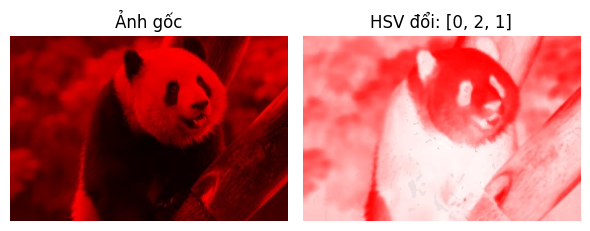

In [ ]:
#bài 9
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
import scipy.ndimage as sn

# Thư mục ảnh gốc và ảnh đầu ra
input_dir = 'Exercise'
output_dir = 'Exercise_hsv_random'
os.makedirs(output_dir, exist_ok=True)

# Lấy danh sách ảnh hợp lệ
image_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg', '.bmp'))]

for filename in image_files:
    path_in = os.path.join(input_dir, filename)
    img_bgr = cv2.imread(path_in)

    if img_bgr is None:
        print(f"Không đọc được ảnh: {filename}")
        continue

    # Khử nhiễu từng kênh bằng median filter
    denoised = np.zeros_like(img_bgr)
    for c in range(3):
        denoised[:, :, c] = sn.median_filter(img_bgr[:, :, c], size=3)

    # Chuyển sang hệ HSV
    img_hsv = cv2.cvtColor(denoised, cv2.COLOR_BGR2HSV)

    # Tạo thứ tự HSV ngẫu nhiên (không trùng)
    order = [0, 1, 2]
    while True:
        new_order = order.copy()
        random.shuffle(new_order)
        if new_order != order:
            break

    hsv_swapped = img_hsv[:, :, new_order]

    # Chuyển ngược về BGR để lưu và hiển thị
    img_result = cv2.cvtColor(hsv_swapped, cv2.COLOR_HSV2BGR)

    # Lưu ảnh
    out_path = os.path.join(output_dir, f"hsv_random_{filename}")
    cv2.imwrite(out_path, img_result)
    print(f"Đã lưu: {out_path} (hoán đổi HSV {order} -> {new_order})")

    # Hiển thị
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.title("Ảnh gốc")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB))
    plt.title(f"HSV đổi: {new_order}")
    plt.axis("off")
    plt.tight_layout()
    plt.show()
